In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [3]:
# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100)**2)).apply(lambda x : 1 if x > 25 else 0)

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['gluc'] = df['gluc'].apply(lambda x : 0 if x==1 else 1)
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x==1 else 1)

In [5]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [6]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat['total'] = 0
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

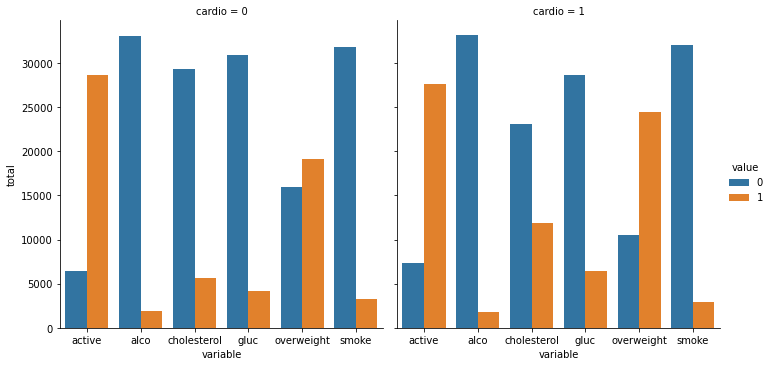

In [7]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x='variable', y='total', hue='value', kind='bar', col='cardio', data=df_cat).fig

In [8]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

In [9]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

<AxesSubplot:>

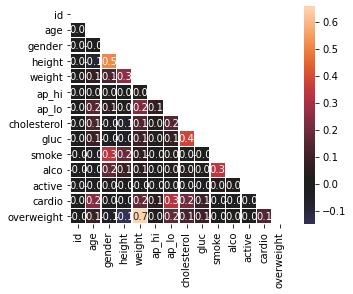

In [12]:
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f',
                linewidth=.5, linecolor='white', center=0, square=True)